In [1]:
require(rms)

Loading required package: rms

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: SparseM


Attaching package: ‘SparseM’


The following object is masked from ‘package:base’:

    backsolve




In [2]:
getHdata(titanic3)
v<-c('pclass', 'survived', 'age', 'sex', 'sibsp','parch')
t3<- titanic3[,v]
units(t3$age)<-'years'

In [3]:
describe(t3)

t3 

 6  Variables      1309  Observations
--------------------------------------------------------------------------------
pclass 
       n  missing distinct 
    1309        0        3 
                            
Value        1st   2nd   3rd
Frequency    323   277   709
Proportion 0.247 0.212 0.542
--------------------------------------------------------------------------------
survived : Survived 
       n  missing distinct     Info      Sum     Mean      Gmd 
    1309        0        2    0.708      500    0.382   0.4725 

--------------------------------------------------------------------------------
age : Age [years] 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1046      263       98    0.999    29.88    16.06        5       14 
     .25      .50      .75      .90      .95 
      21       28       39       50       57 

lowest :  0.1667  0.3333  0.4167  0.6667  0.7500
highest: 70.5000 71.0000 74.0000 76.0000 80.0000
----------------------------

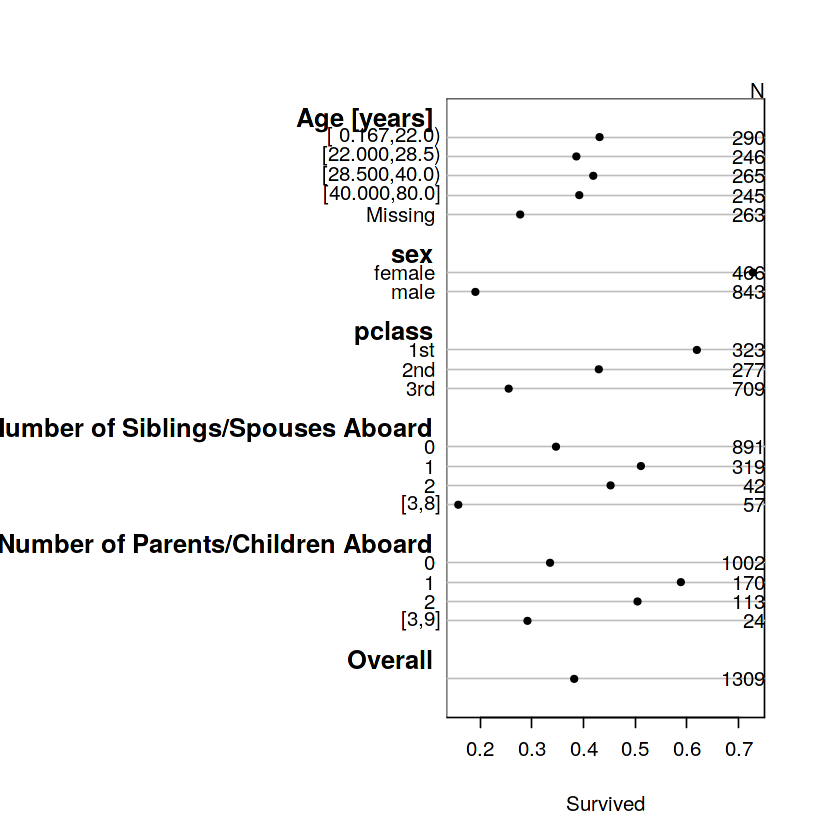

In [4]:
dd<-datadist(t3)
options(datadist='dd')
s<-summary(survived~age+sex+pclass+cut2(sibsp,0:3)+cut2(parch, 0:3), data=t3)
plot(s,main='',subtitles=FALSE)

Warning message:
“Using size for a discrete variable is not advised.”


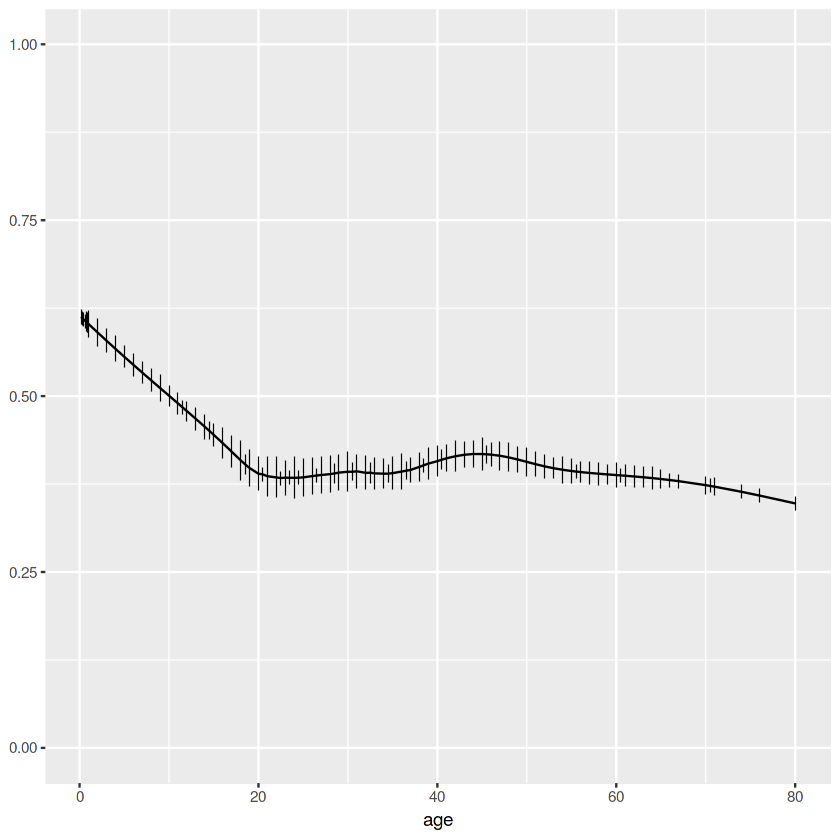

In [5]:
b<-scale_size_discrete(range=c(.1,.85))
y1<-ylab(NULL)
p1<-ggplot(t3, aes(x=age, y=survived))+histSpikeg(survived~age, lowess=TRUE,data=t3)+ylim(0,1)+y1
p1

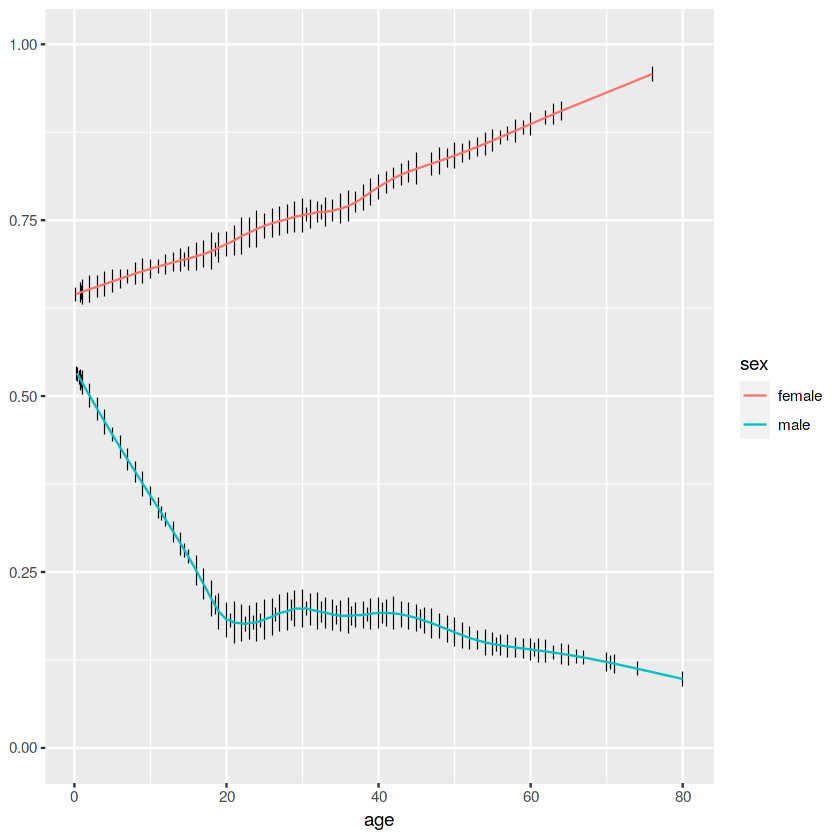

In [6]:
p2<-ggplot(t3, aes(x=age, y=survived, color=sex))+histSpikeg(survived~age+sex, lowess=TRUE,data=t3)+ylim(0,1)+y1
p2

Warning message:
“Removed 5 rows containing missing values (geom_segment).”
Warning message:
“Removed 7 row(s) containing missing values (geom_path).”


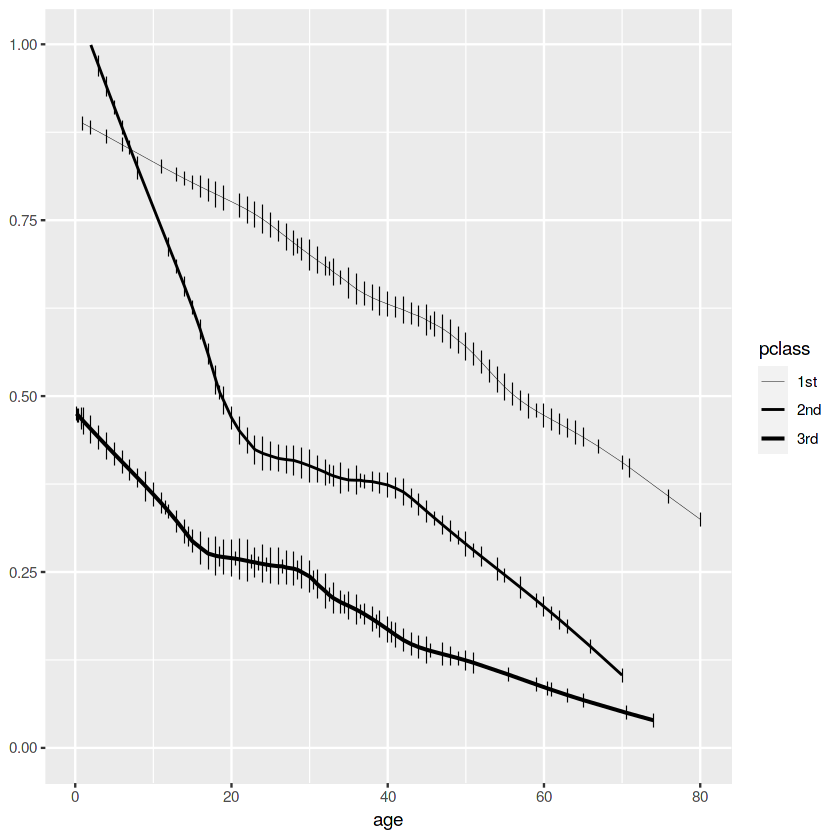

In [7]:
p3<-ggplot(t3, aes(x=age, y=survived, size=pclass))+histSpikeg(survived~age+pclass, lowess=TRUE,data=t3)+b+ylim(0,1)+y1
p3

Warning message:
“Removed 13 rows containing missing values (geom_segment).”
Warning message:
“Removed 12 row(s) containing missing values (geom_path).”


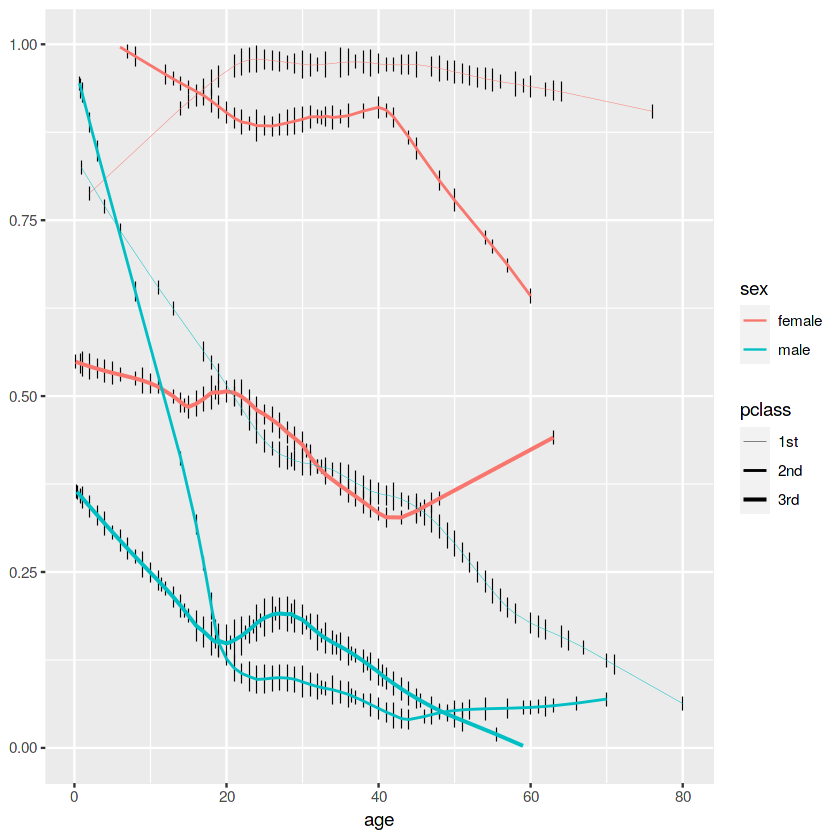

In [8]:
p4<-ggplot(t3, aes(x=age, y=survived,color=sex, size=pclass))+histSpikeg(survived~age+sex+pclass, lowess=TRUE,data=t3)+b+ylim(0,1)+y1
p4

Don't know how to automatically pick scale for object of type labelled. Defaulting to continuous.

Warning message:
“Removed 263 rows containing non-finite values (stat_plsmo).”
Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”


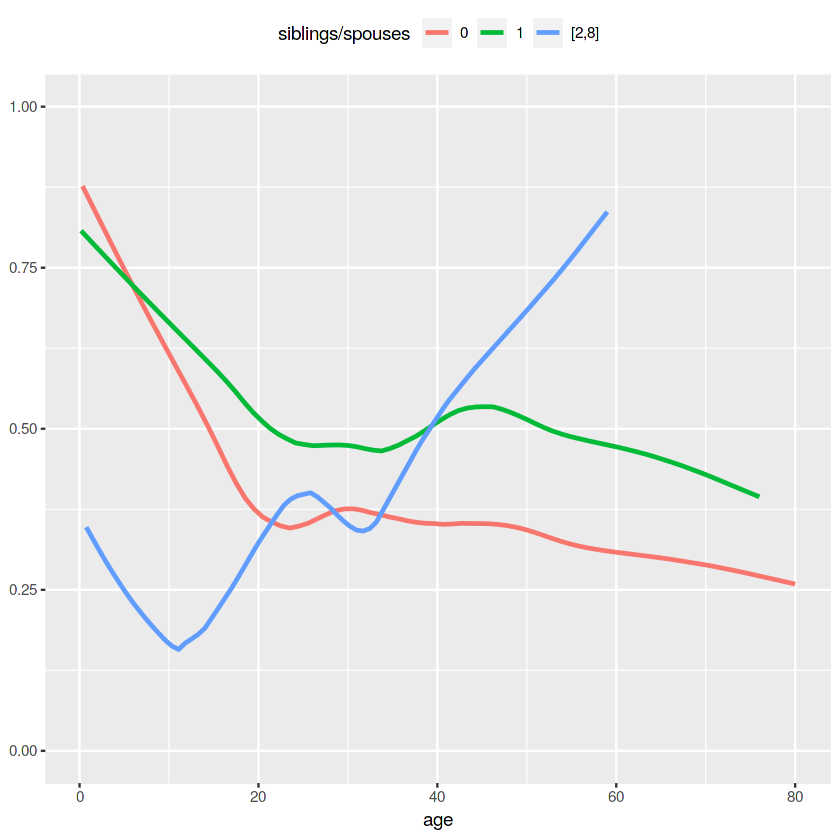

In [9]:
top<-theme(legend.position='top')
p1<- ggplot(t3, aes(x=age, y=survived, color=cut2(sibsp,0:2)))+stat_plsmo()+b+ylim(0,1)+y1+top+scale_color_discrete(name='siblings/spouses')
p1

Don't know how to automatically pick scale for object of type labelled. Defaulting to continuous.

Warning message:
“Removed 263 rows containing non-finite values (stat_plsmo).”
Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”


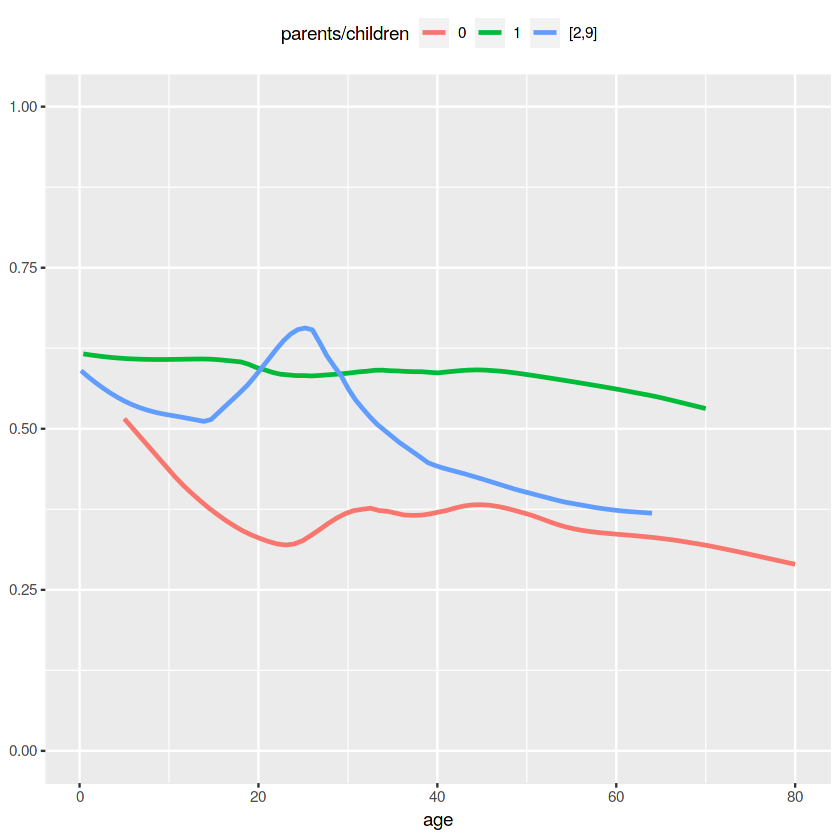

In [10]:
top<-theme(legend.position='top')
p1<- ggplot(t3, aes(x=age, y=survived, color=cut2(parch,0:2)))+stat_plsmo()+b+ylim(0,1)+y1+top+scale_color_discrete(name='parents/children')
p1

In [11]:
f1<- lrm(survived~sex*pclass*rcs(age,5)+rcs(age,5)*(sibsp+parch),data=t3)
f1

Frequencies of Missing Values Due to Each Variable
survived      sex   pclass      age    sibsp    parch 
       0        0        0      263        0        0 

Logistic Regression Model
 
 lrm(formula = survived ~ sex * pclass * rcs(age, 5) + rcs(age, 
     5) * (sibsp + parch), data = t3)
 
 
                       Model Likelihood     Discrimination    Rank Discrim.    
                          Ratio Test           Indexes           Indexes       
 Obs          1046    LR chi2     573.41    R2       0.569    C       0.883    
  0            619    d.f.            39    g        2.560    Dxy     0.766    
  1            427    Pr(> chi2) <0.0001    gr      12.933    gamma   0.767    
 max |deriv| 0.004                          gp       0.369    tau-a   0.370    
                                            Brier    0.127                     
 
                                Coef     S.E.    Wald Z Pr(>|Z|)
 Intercept                       -2.9622  6.0616 -0.49  0.6251  
 sex=male  

In [12]:
f<- lrm(survived~(sex+pclass+rcs(age,5))^2 +rcs(age,5)*sibsp,data=t3)
f

Frequencies of Missing Values Due to Each Variable
survived      sex   pclass      age    sibsp 
       0        0        0      263        0 

Logistic Regression Model
 
 lrm(formula = survived ~ (sex + pclass + rcs(age, 5))^2 + rcs(age, 
     5) * sibsp, data = t3)
 
 
                       Model Likelihood     Discrimination    Rank Discrim.    
                          Ratio Test           Indexes           Indexes       
 Obs          1046    LR chi2     553.87    R2       0.555    C       0.878    
  0            619    d.f.            26    g        2.427    Dxy     0.756    
  1            427    Pr(> chi2) <0.0001    gr      11.325    gamma   0.758    
 max |deriv| 6e-06                          gp       0.365    tau-a   0.366    
                                            Brier    0.130                     
 
                       Coef    S.E.   Wald Z Pr(>|Z|)
 Intercept              3.3075 1.8427  1.79  0.0727  
 sex=male              -1.1478 1.0878 -1.06  0.2914  
 pc

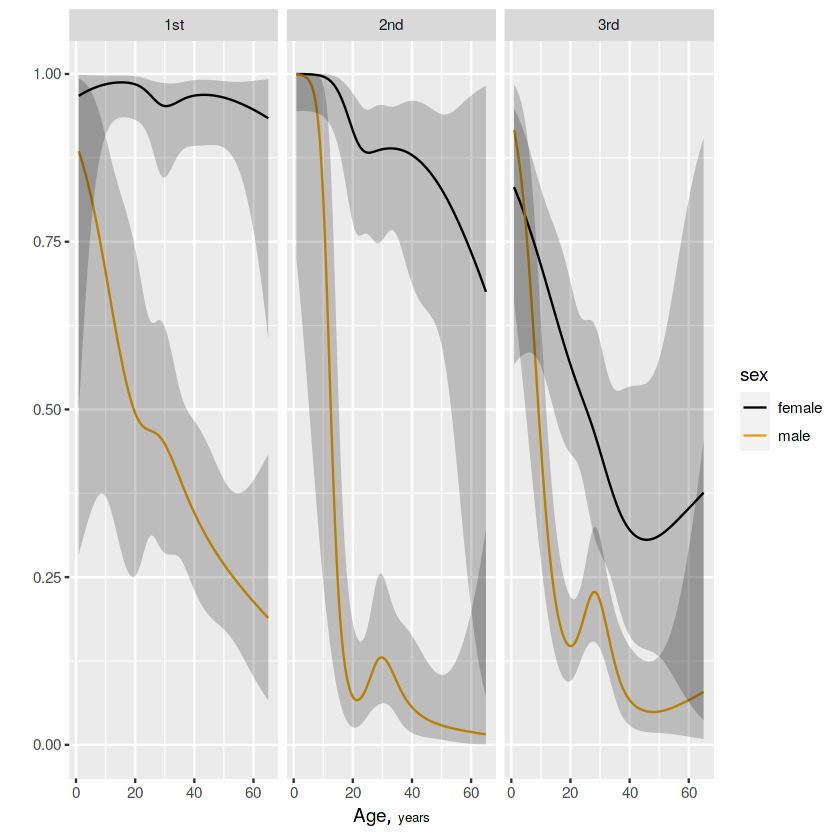

In [13]:
p<-Predict(f, age, sex, pclass, sibsp=0, fun=plogis)
ggplot(p)

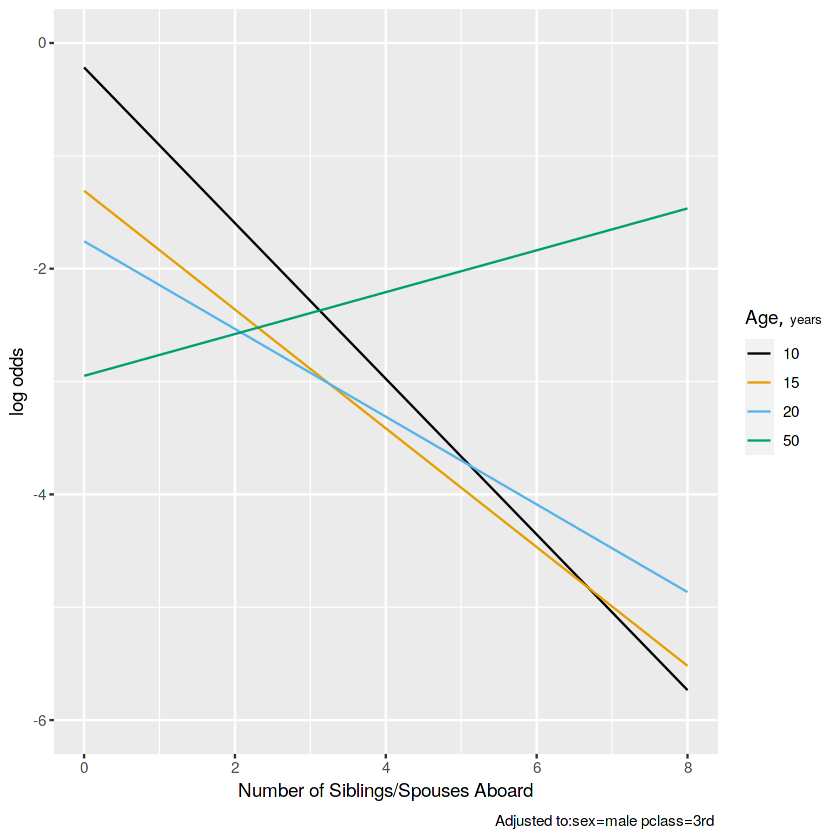

In [14]:
ggplot(Predict(f,sibsp,age=c(10,15,20,50),conf.int=FALSE))